# Análisis exploratorio de datos con PySpark 

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
import findspark
findspark.init()

Sesión de trabajo

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

Importar paquetes útiles

In [0]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import *
from pyspark.sql.functions import *

In [76]:
# Establecer contexto de SQL
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

# Versión de Spark instalada
print(spark.version)

2.4.5


In [0]:
import pandas as pd

# Descargar y leer datos
review_df = pd.read_csv('https://assets.datacamp.com/production/repositories/1704/datasets/d26c25f46746882d0a0f474cc6709c629f69872c/2017_StPaul_MN_Real_Estate.csv')

In [78]:
review_df.head()

,No.,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",NaN,Main,No,NaN,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,NaN,1950,Residential-Single,(SF) One Story,1.280,Central,"Range, Dishwasher, Refrigerator",NaN,NaN,NaN,Vinyl,NaN,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0.0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,NaN,NaN,NaN,NaN,3,0,NaN,0,Unknown,0.0
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,NaN,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,NaN,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,NaN,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.320,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",NaN,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2.0,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,NaN,0,Unknown,0.0
2,3,RMLS,8583,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,225000,6/26/2017 0:00,225000,Exclusive Right,225000,204.1742,1102,None,E1,120x296,622 - North St Paul-Maplewood,28,7/24/2017 0:00,0,14x12,"Living Room, Dining Room, Family Room, Kitchen...",NaN,Main,No,None,28,Attached Garage,1102,2390,Main,20x13,2390.0,2016,1102,NaN,1949,Residential-Single,(SF) One Story,0.822,Window,"Range, Microwave, Dishwasher, Refrigerator, Wa...",NaN,NaN,NaN,Cement Board,NaN,Main,18x11,Informal Dining Room,"Full, Crawl Space, Concrete Block",1,0,0,0.0,SF,1,Main Floor Full Bath,12x12,Main,12x12,Main,NaN,NaN,NaN,NaN,2,0,Not Assumable,0,No,0.0
3,4,RMLS,9350,9350 31st St N,31st,55042,MN,LELM - Lake Elmo,265000,8/25/2017 0:00,230000,Exclusive Right,230000,162.3775,959,None,A1,208X208,834 - Stillwater,19,9/13/2017 0:00,1,12X16,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,19,"Attached Garage, Detached Garage, Tuckunder, D...",1284,2146,NaN,NaN,2146.0,2017,1632,NaN,1960,Residential-Single,(SF) One Story,0.940,Central,"Range, Washer, Dryer",NaN,Main Level,25X13,Stucco,Main,Main,20X11,NaN,"Full, Partial Finished, Drain Tiled, Sump Pump",1,1,0,0.0,SF,2,"Main Floor Full Bath, 1/2 Basement",13X11,Main,13X10,Main,NaN,NaN,NaN,NaN,2,348,NaN,0,Unknown,0.0
4,5,RMLS,2915,2915 Inwood Ave N,Inwood,55042,MN,LELM - Lake Elmo,249900,9/12/2017 0:00,239900,Exclusive Right,239900,121.7836,1026,Chain Link,E1,116x200,622 - North St Paul-Maplewood,21,10/3/2017 0:00,1,12x10,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Age Over 8 Years",Main,No,NaN,21,"Attached Garage, Driveway - Asphalt, Garage Do...",1026,2010,Main,22x14,2010.0,2017,2052,NaN,19

In [0]:
# Ir a través de las columnas ir cambiarlas a caracteres - Spark molesta de lo contrario
o_type = review_df['MLSID'].dtypes
for column in review_df.columns:
    if review_df[column].dtype == o_type:
        review_df[column] = review_df[column].astype('str')

review_df['streetaddress'] = review_df['streetaddress'].astype('str')

In [0]:
# Leer el dataframe de pandas como uno de Spark
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
df = sqlContext.createDataFrame(review_df)

In [0]:
# Tipos de datos adecuados puesto que se leyó como texto
data_types = \
[('NO', 'bigint'),
 ('MLSID', 'string'),
 ('STREETNUMBERNUMERIC', 'bigint'),
 ('STREETADDRESS', 'string'),
 ('STREETNAME', 'string'),
 ('POSTALCODE', 'bigint'),
 ('STATEORPROVINCE', 'string'),
 ('CITY', 'string'),
 ('SALESCLOSEPRICE', 'bigint'),
 ('LISTDATE', 'timestamp'),
 ('LISTPRICE', 'bigint'),
 ('LISTTYPE', 'string'),
 ('ORIGINALLISTPRICE', 'bigint'),
 ('PRICEPERTSFT', 'double'),
 ('FOUNDATIONSIZE', 'bigint'),
 ('FENCE', 'string'),
 ('MAPLETTER', 'string'),
 ('LOTSIZEDIMENSIONS', 'string'),
 ('SCHOOLDISTRICTNUMBER', 'string'),
 ('DAYSONMARKET', 'bigint'),
 ('OFFMARKETDATE', 'timestamp'), 
 ('FIREPLACES', 'bigint'),
 ('ROOMAREA4', 'string'),
 ('ROOMTYPE', 'string'),
 ('ROOF', 'string'),
 ('ROOMFLOOR4', 'string'),
 ('POTENTIALSHORTSALE', 'string'),
 ('POOLDESCRIPTION', 'string'),
 ('PDOM', 'double'),
 ('GARAGEDESCRIPTION', 'string'),
 ('SQFTABOVEGROUND', 'bigint'),
 ('TAXES', 'bigint'),
 ('ROOMFLOOR1', 'string'),
 ('ROOMAREA1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'bigint'),
 ('LIVINGAREA', 'bigint'),
 ('UNITNUMBER', 'string'),
 ('YEARBUILT', 'bigint'),
 ('ZONING', 'string'),
 ('STYLE', 'string'),
 ('ACRES', 'double'),
 ('COOLINGDESCRIPTION', 'string'),
 ('APPLIANCES', 'string'),
 ('BACKONMARKETDATE', 'timestamp'),
 ('ROOMFAMILYCHAR', 'string'),
 ('ROOMAREA3', 'string'),
 ('EXTERIOR', 'string'),
 ('ROOMFLOOR3', 'string'),
 ('ROOMFLOOR2', 'string'),
 ('ROOMAREA2', 'string'),
 ('DININGROOMDESCRIPTION', 'string'),
 ('BASEMENT', 'string'),
 ('BATHSFULL', 'bigint'),
 ('BATHSHALF', 'bigint'),
 ('BATHQUARTER', 'bigint'),
 ('BATHSTHREEQUARTER', 'double'),
 ('CLASS', 'string'),
 ('BATHSTOTAL', 'bigint'),
 ('BATHDESC', 'string'),
 ('ROOMAREA5', 'string'),
 ('ROOMFLOOR5', 'string'),
 ('ROOMAREA6', 'string'),
 ('ROOMFLOOR6', 'string'),
 ('ROOMAREA7', 'string'),
 ('ROOMFLOOR7', 'string'),
 ('ROOMAREA8', 'string'),
 ('ROOMFLOOR8', 'string'),
 ('BEDROOMS', 'bigint'),
 ('SQFTBELOWGROUND', 'bigint'),
 ('ASSUMABLEMORTGAGE', 'string'),
 ('ASSOCIATIONFEE', 'bigint'),
 ('ASSESSMENTPENDING', 'string'),
 ('ASSESSEDVALUATION', 'double'),
 ('latitude', 'double'),
 ('longitude', 'double')]


In [0]:
# Corregir los tipos de datos
# .withColumn crea una nueva columna para los dataframes de Spark, la cual puede reemplazar una del mismo nombre
df = df.withColumn("LISTDATE", to_timestamp("LISTDATE", "MM/dd/yyyy"))
df = df.withColumn("OFFMARKETDATE", to_timestamp("OFFMARKETDATE", "MM/dd/yyy"))
df = df.withColumn("AssessedValuation", df["AssessedValuation"].cast("double"))
df = df.withColumn("AssociationFee", df["AssociationFee"].cast("bigint"))
df = df.withColumn("SQFTBELOWGROUND", df["SQFTBELOWGROUND"].cast("bigint"))
df = df.withColumn("Bedrooms", df["Bedrooms"].cast("bigint"))
df = df.withColumn("BATHSTOTAL", df["BATHSTOTAL"].cast("bigint"))
df = df.withColumn("BATHSTHREEQUARTER", df["BATHSTHREEQUARTER"].cast("double"))
df = df.withColumn("BATHQUARTER", df["BATHQUARTER"].cast("bigint"))
df = df.withColumn("BathsHalf", df["BathsHalf"].cast("bigint"))
df = df.withColumn("BathsFull", df["BathsFull"].cast("bigint"))
df = df.withColumn("backonmarketdate", df["backonmarketdate"].cast("double"))
df = df.withColumn("ACRES", df["ACRES"].cast("double"))
df = df.withColumn("YEARBUILT", df["YEARBUILT"].cast("bigint"))
df = df.withColumn("LivingArea", df["LivingArea"].cast("bigint"))
df = df.withColumn("TAXYEAR", df["TAXYEAR"].cast("bigint"))
df = df.withColumn("TAXWITHASSESSMENTS", df["TAXWITHASSESSMENTS"].cast("double"))
df = df.withColumn("Taxes", df["Taxes"].cast("bigint"))
df = df.withColumn("SQFTABOVEGROUND", df["SQFTABOVEGROUND"].cast("bigint"))
df = df.withColumn("PDOM", df["PDOM"].cast("bigint"))
df = df.withColumn("Fireplaces", df["Fireplaces"].cast("bigint"))
df = df.withColumn("FOUNDATIONSIZE", df["FOUNDATIONSIZE"].cast("bigint"))
df = df.withColumn("PricePerTSFT", df["PricePerTSFT"].cast("double"))
df = df.withColumn("OriginalListPrice", df["OriginalListPrice"].cast("bigint"))
df = df.withColumn("LISTPRICE", df["OriginalListPrice"].cast("bigint"))
df = df.withColumn("SalesClosePrice", df["SalesClosePrice"].cast("bigint"))
df = df.withColumn("PostalCode", df["PostalCode"].cast("bigint"))
#df = df.withColumn("No.", df["No."].cast("bigint"))


In [0]:
# Eliminar la columna No, Spark molesta por el '.'
df = df.drop('No.')

# Estadísticos resumen

In [48]:
# No es posible utilizar el método shape para un df de Spark a marzo de 2020; una alternativa es la siguiente:
print((df.count(), len(df.columns)))

(5000, 73)


In [49]:
# Describir una columna
df[['SalesClosePrice']].describe().show() # Nótese el doble paréntesis cuadrado  
                                          # .show() forza a Spark a mostrar el resultado 


+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998536|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



In [84]:
# O múltiples columnas
df.select(['LISTPRICE', 'Taxes', 'SQFTABOVEGROUND', 'FOUNDATIONSIZE',
           'Fireplaces']).describe().show()

+-------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|        LISTPRICE|            Taxes|  SQFTABOVEGROUND|    FOUNDATIONSIZE|        Fireplaces|
+-------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|             5000|             5000|             5000|              5000|              5000|
|   mean|      275002.6304|        3373.6548|         1489.013|         1016.4118|            0.5848|
| stddev|409620.6825325364|36040.69828046268|626.4868033517992|339.26040521297074|0.7088790178107819|
|    min|                5|                0|                1|                 1|                 0|
|    max|         21990000|          2547070|             7200|              3792|                 8|
+-------+-----------------+-----------------+-----------------+------------------+------------------+



In [85]:
# Covarianza

# Covarianza es una medida de cómo dos variables cambian una con respecto de la otra. Un número positivo
# indica que hay una tendencia de que a medida que una variable aumenta, la otra también lo haga. Un
# número negativo indica que hay una tendencia de que a medida que una variable aumenta,
# la otra disminuya:

print(df.cov('SalesClosePrice', 'YEARBUILT'))
# o
print(df.stat.cov('SalesClosePrice', 'YEARBUILT'))

1281910.3840634993
1281910.3840634993


In [86]:
# Correlación es una medida normalizada de la covarianza que indica dependencia estadística
# entre dos variables, o que indica una relación lineal entre estas.

print(df.corr('SalesClosePrice', 'YEARBUILT'))
print(df.stat.corr('SalesClosePrice', 'YEARBUILT'))

0.23475142032507101
0.23475142032507101


In [87]:
# Agregar
print("Average sales price: ${}".format(df.agg({'SalesClosePrice': 'mean'})\
      .collect()[0][0]))
print("Standard deviation of sales prices: ${}"\
      .format(df.agg({'SalesClosePrice': 'stddev'}).collect()[0][0]))
print("Max sales price: ${}"\
      .format(df.agg({'SalesClosePrice': 'max'}).collect()[0][0]))
print("Min sale price: ${}".format(df.agg({'SalesClosePrice': 'min'})\
      .collect()[0][0]))

Average sales price: $262804.4668
Standard deviation of sales prices: $140559.82591998536
Max sales price: $1700000
Min sale price: $48000


# Inspección a través de modelos lineales y distribución

In [0]:
# Paquetes para graficar
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Al convertir el dataframe de Spark a pandas, es buena idea hacer una muestra del
# total de los datos, puesto que la idea es utilizar el poder de cómputo de Spark,
# más no el de la máquina local

s_df = df.select(['SalesClosePrice', 'YEARBUILT'])\
         .sample(withReplacement=False, fraction=0.5, seed=42)

# Crear el nuevo dataframe de muestra
s_df_pandas = s_df.toPandas() 

# Dataframe entero
df_pandas = df.toPandas()

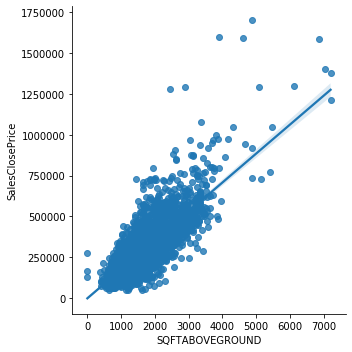

In [90]:
# Modelo lineal básico con seaborn
sns.lmplot(y = 'SalesClosePrice', x = 'SQFTABOVEGROUND', data=df_pandas)

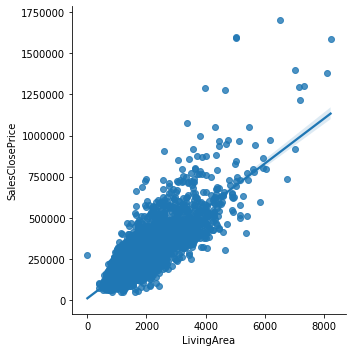

In [92]:
sns.lmplot(y = 'SalesClosePrice', x = 'LivingArea', data=df_pandas)

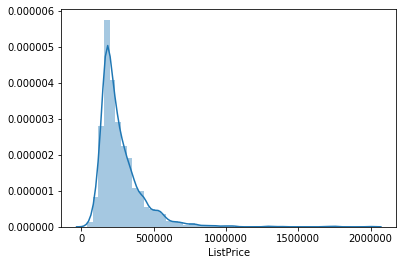

In [93]:
# Distribución
# Seleccionar muestra de nuevo pero para una columna
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Graficar distribución
sns.distplot(pandas_df)
plt.xlabel('ListPrice') 
plt.show()

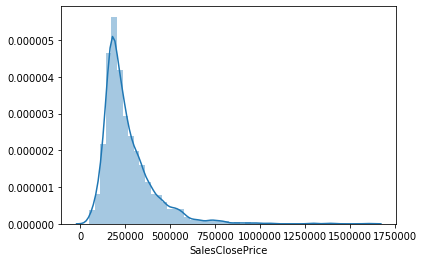

In [94]:
# Distribución
# Seleccionar muestra de nuevo pero para una columna
sample_df = df.select(['SalesClosePrice']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Graficar distribución
sns.distplot(pandas_df)
plt.xlabel('SalesClosePrice') 
plt.show()

In [95]:
print(df.corr('SalesClosePrice', 'LivingArea'))
print(df.corr('SalesClosePrice', 'SQFTABOVEGROUND'))

0.8162701823275643
0.7901878498502971


# Filtrado con condiciones

> Bloque con sangría



In [0]:
# Filtrar por hogares caros
df.where(df['SalesClosePrice'] > 1000000)[['SalesClosePrice']].show(10)

+---------------+
|SalesClosePrice|
+---------------+
|        1277023|
|        1050000|
|        1290000|
|        1295000|
|        1215000|
|        1380000|
|        1300000|
|        1400000|
|        1595000|
|        1600000|
+---------------+
only showing top 10 rows



In [62]:
# Filtrar por hogares baratos
df.where(df['SalesClosePrice'] < 100000)[['SalesClosePrice']].show(10)

+---------------+
|SalesClosePrice|
+---------------+
|          90000|
|          94900|
|          79900|
|          78000|
|          99000|
|          80000|
|          48000|
|          49900|
|          80004|
|          50800|
+---------------+
only showing top 10 rows



In [63]:
# ¿Por qué no los dos? 
# No hay diferencia entre usar .where() o  .filter()
# .filter() está pensado para las personas acostumbradas a Scala, mientras que .where() para SQL
df.filter((df['SalesClosePrice'] < 100000) | 
          (df['SalesClosePrice'] > 1000000))[['SalesClosePrice']].describe()\
          .show()

+-------+-----------------+
|summary|  SalesClosePrice|
+-------+-----------------+
|  count|              128|
|   mean|   220585.4921875|
| stddev|401209.0720967758|
|    min|            48000|
|    max|          1700000|
+-------+-----------------+



In [64]:
# ¿Y si no me gustaran los techos de metal pero cuento con un presupuesto alto?
df.where((df['ROOF'] != 'Metal') &
          (df['SalesClosePrice'] > 1000000))[['SalesClosePrice', 'ROOF']]\
         .show(truncate=50)

+---------------+-------------------------------------------+
|SalesClosePrice|                                       ROOF|
+---------------+-------------------------------------------+
|        1277023|                                        nan|
|        1050000|                                        nan|
|        1290000|                           Asphalt Shingles|
|        1295000|Asphalt Shingles, Pitched, Age Over 8 Years|
|        1215000|                           Asphalt Shingles|
|        1380000|                                        nan|
|        1300000|                           Asphalt Shingles|
|        1400000|              Age Over 8 Years, Tile, Metal|
|        1595000|      Asphalt Shingles, Age 8 Years or Less|
|        1600000|                                     Shakes|
|        1700000|                                        nan|
|        1585000|                                      Slate|
|        1050216|      Asphalt Shingles, Age 8 Years or Less|
|       

# Quitar NAs

In [96]:
# Remover filas que contengan nas
df.dropna().count() # una columna está llena de nas y eso hace que todo el df desaparezca

0

In [97]:
# Remover observaciones si hay más de 3 nas por columna
df.dropna(thresh=3).count()

5000

In [0]:
# Lista de columnas a remover
cols_to_drop = ['No.', 'UNITNUMBER', 'CLASS']

# Removerlas 
df = df.drop(*cols_to_drop) # La estrella (*) le dice a la función que
                            # desenliste la lista y las quite una por una

# Valores faltantes

In [0]:
columns = ['APPLIANCES','BACKONMARKETDATE','ROOMFAMILYCHAR', 'BASEMENT',
           'DININGROOMDESCRIPTION']
# Muestra del df y convertir a pandas
sample_df = df.select(columns).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Convertir valores en Falso / Verdadero
tf_df = pandas_df.isnull()

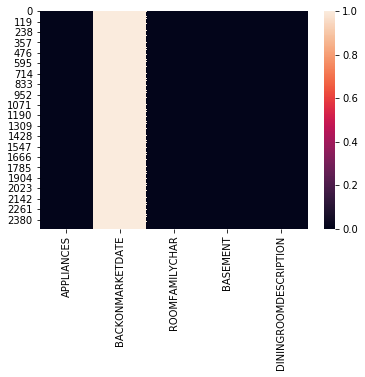

In [100]:
# Graficarlo
sns.heatmap(data=tf_df)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Imputar datos

In [101]:
# filas con datos faltantes
missing = df.where(df['PDOM'].isNull()).count()

# Calcular promedio
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

# Reemplazar por el promedio para la columna
df.fillna(col_mean, subset=['PDOM'])[['PDOM']].show(5)

+----+
|PDOM|
+----+
|  10|
|   4|
|  28|
|  19|
|  21|
+----+
only showing top 5 rows

